## Import Libraries and Data

In [4]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_19-25-05-23.csv', firstRow=492, lastRow=498)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_220523_S493-498.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [5]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=54s and ended at t=476s; mass=42.7603g
This equals a volume of 42.846m; expected was 43.539mL; error is 1.592%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.001 g/s and for 2nd derivative = 0.0002 g/s^2


<IPython.core.display.Javascript object>


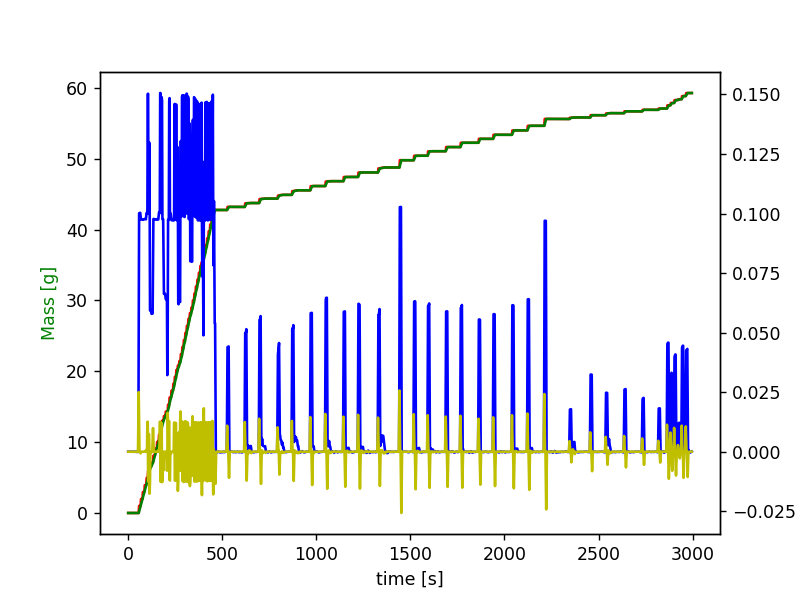

Addition of 0.443g Texapon SB 3 KC detected from 522s to 542s - expected volume = 0.769mL and actual volume = 0.392mL (resulting error is 49.022%)
Addition of 0.55g Plantapon ACG 50 detected from 616s to 660s - expected volume = 0.515mL and actual volume = 0.486mL (resulting error is 5.592%)
Addition of 0.631g Plantapon ACG 50 detected from 692s to 736s - expected volume = 0.515mL and actual volume = 0.558mL (resulting error is 8.285%)
Addition of 0.532g Plantacare 818 detected from 790s to 834s - expected volume = 0.577mL and actual volume = 0.488mL (resulting error is 15.358%)
Addition of 0.642g Plantacare 818 detected from 866s to 912s - expected volume = 0.577mL and actual volume = 0.588mL (resulting error is 1.987%)
Addition of 0.605g Dehyton MC detected from 964s to 994s - expected volume = 0.592mL and actual volume = 0.561mL (resulting error is 5.247%)
Addition of 0.69g Dehyton MC detected from 1044s to 1082s - expected volume = 0.592mL and actual volume = 0.64mL (resulting erro

In [6]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

#t2 = massProfile.defineIngredientsManually(specType='surfactant',steps=steps,show=True,manualTimes=[560,600,700,800,900,1000,1100,1150,1250,1320,1400,1500,1580,1650,1730,1830,1920,2000,2080,2140])

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.00025 g/s^2


<IPython.core.display.Javascript object>


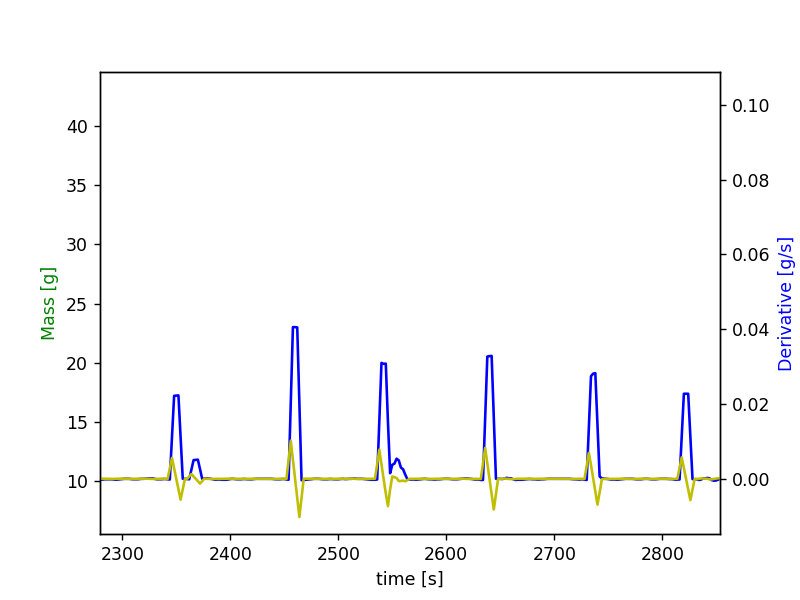

Addition of 0.217g Dehyquart CC6 detected from 2342s to 2378s - expected volume = 0.213mL and actual volume = 0.203mL (resulting error is 4.66%)
Addition of 0.321g Dehyquart CC6 detected from 2452s to 2470s - expected volume = 0.168mL and actual volume = 0.299mL (resulting error is 78.194%)
Addition of 0.297g Dehyquart CC6 detected from 2534s to 2568s - expected volume = 0.237mL and actual volume = 0.282mL (resulting error is 18.75%)
Addition of 0.26g Dehyquart CC6 detected from 2632s to 2650s - expected volume = 0.193mL and actual volume = 0.248mL (resulting error is 28.899%)
Addition of 0.224g Dehyquart CC6 detected from 2728s to 2746s - expected volume = 0.163mL and actual volume = 0.212mL (resulting error is 30.16%)
Addition of 0.18g Dehyquart CC6 detected from 2814s to 2832s - expected volume = 0.145mL and actual volume = 0.169mL (resulting error is 16.802%)


In [7]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

#t3 = massProfile.defineIngredientsManually(specType='polyelectrolyte',steps=steps,show=True,manualTimes=[2014,2112,2210,2314,2412,2494,2564])

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


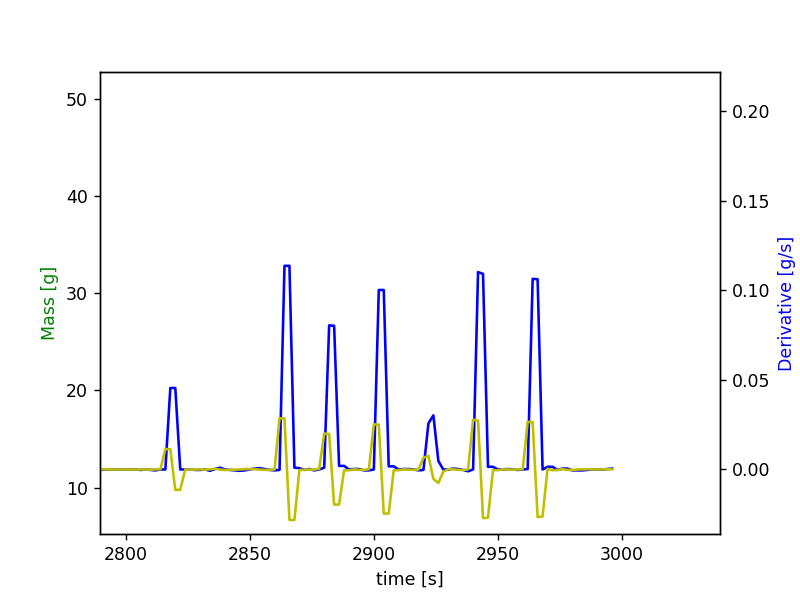

Addition of 0.456g Arlypon F detected from 2860s to 2872s - expected volume = 0.516mL and actual volume = 0.513mL (resulting error is 0.654%)
Addition of 0.331g Arlypon F detected from 2878s to 2890s - expected volume = 0.349mL and actual volume = 0.371mL (resulting error is 6.27%)
Addition of 0.406g Arlypon F detected from 2898s to 2910s - expected volume = 0.44mL and actual volume = 0.464mL (resulting error is 5.455%)
Addition of 0.121g Arlypon F detected from 2918s to 2932s - expected volume = 0.119mL and actual volume = 0.139mL (resulting error is 16.346%)
Addition of 0.443g Arlypon F detected from 2938s to 2950s - expected volume = 0.482mL and actual volume = 0.505mL (resulting error is 4.858%)
Addition of 0.431g Arlypon F detected from 2960s to 2972s - expected volume = 0.461mL and actual volume = 0.489mL (resulting error is 6.02%)


In [8]:
# default bl_mult = 1, default mergeSens = 1
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=1, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

#t4 = massProfile.defineIngredientsManually(specType='thickener',steps=steps,show=True,manualTimes=[2780,2834,2844,2848,2862,2884,2906])

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_220523_S487-S492.csv', index=False)
actualMassFractions